<div class="alert alert-block alert-success">
    <h1 align="center">Data Visualization in Python</h1>
    <h3 align="center">Session 03: Seaborn (Tips Dataset)</h3>
</div>

<img src="https://matplotlib.org/_static/logo2_compressed.svg" width=50%>

The primary plotting library for Python is called **Matplotlib**.

**Seaborn** is a plotting library that offers a simpler interface, sensible defaults for plots needed for machine learning, and most importantly, the plots are aesthetically better looking than those in Matplotlib.

- Seaborn requires that Matplotlib is installed first.

- You can install Matplotlib directly using pip, as follows:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code.

import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)

matplotlib: 3.6.0


In [4]:
def sinplot():
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i))

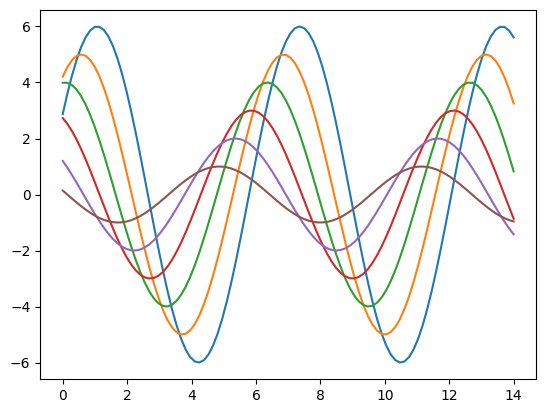

In [5]:
sinplot()

<img src="https://livecodestream.dev/post/how-to-build-beautiful-plots-with-python-and-seaborn/featured_hue585f61b28a74a671118de43150c5d63_166173_680x0_resize_q75_box.jpg" width=50%>

In [7]:
# seaborn
import seaborn
print('seaborn: %s' % seaborn.__version__)

seaborn: 0.12.0


In [8]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [9]:
tips = sns.load_dataset('tips')

In [10]:
type(tips)

pandas.core.frame.DataFrame

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [13]:
pd.crosstab(tips.sex,tips.time)

time,Lunch,Dinner
sex,,
Male,33,124
Female,35,52


In [14]:
tips['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [15]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Visualizing distributions of data

In [16]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

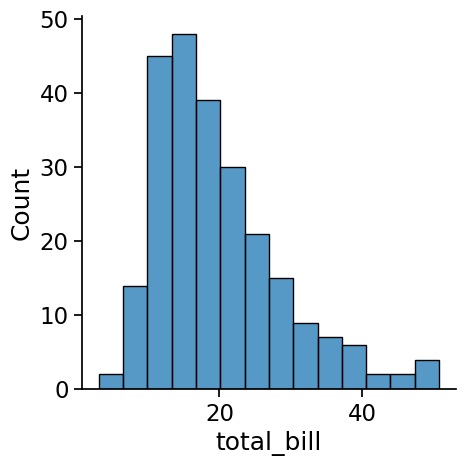

In [17]:
sns.displot(tips, x="total_bill")

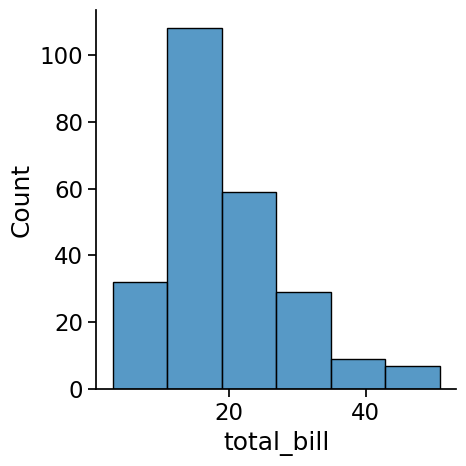

In [18]:
sns.displot(tips, x="total_bill",bins=6)

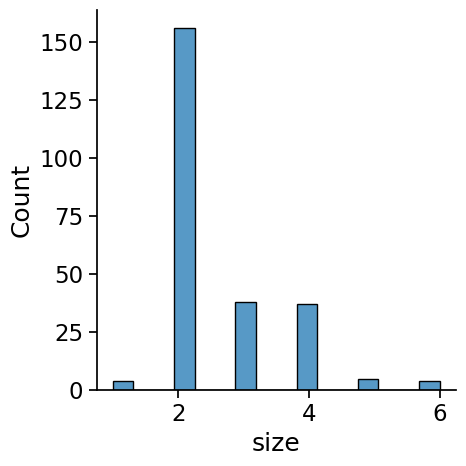

In [19]:
sns.displot(tips, x="size")

One approach would be to specify the precise bin breaks :

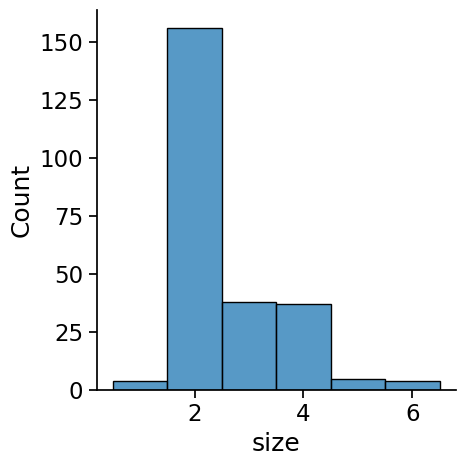

In [20]:
sns.displot(tips, x="size", discrete=True)

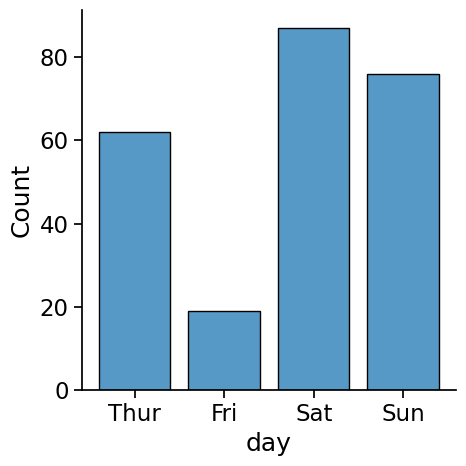

In [21]:
sns.displot(tips, x="day", shrink=0.8)

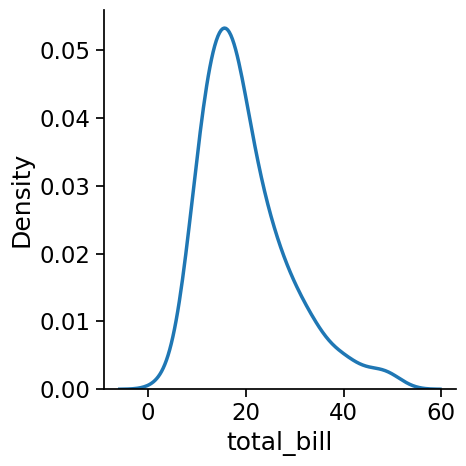

In [22]:
sns.displot(tips, x="total_bill", kind="kde")

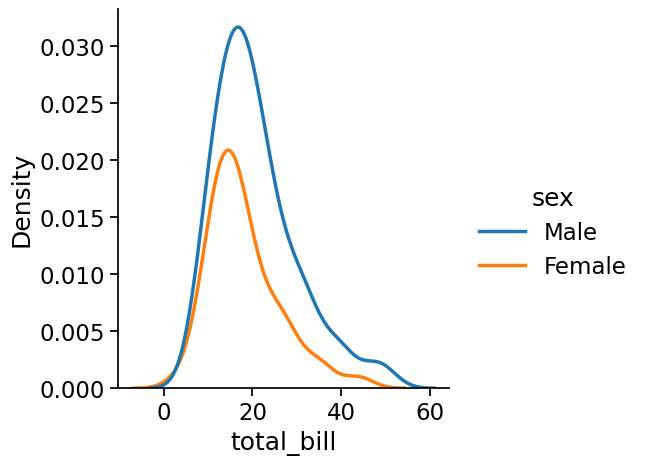

In [23]:
sns.displot(tips, x="total_bill", hue='sex',kind="kde")

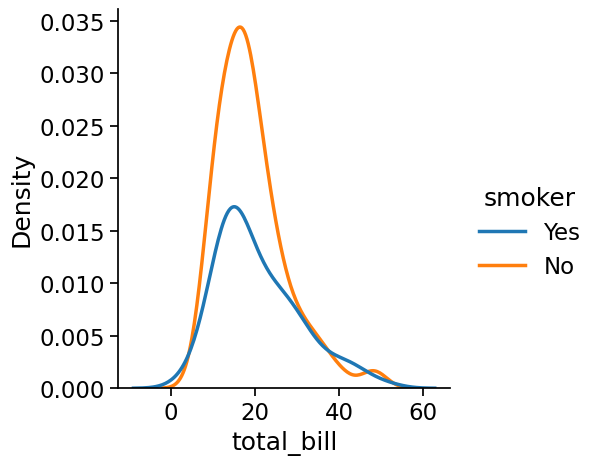

In [24]:
sns.displot(tips, x="total_bill", hue='smoker',kind="kde")

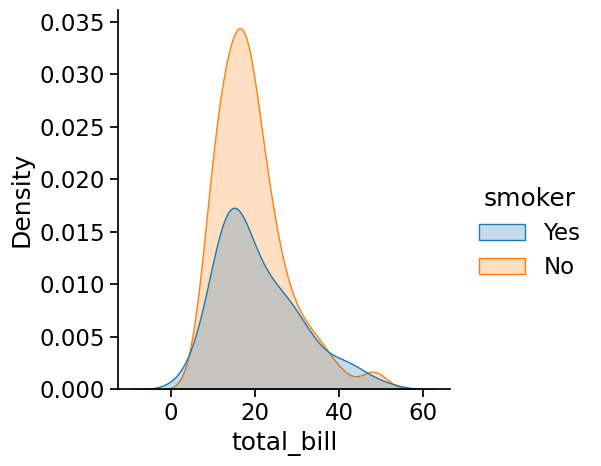

In [25]:
sns.displot(tips, x="total_bill", hue='smoker',kind="kde", fill="True")

# Plotting with *categorical* data

1. pandas(get_dummies)
2. one hot encoder
3. label encoder
4. map

 If one of the main variables is “categorical” (divided into discrete groups) it may be helpful to use a more specialized approach to visualization.

### Categorical scatterplots:

- stripplot() (with kind="strip"; the default)

- swarmplot() (with kind="swarm")

### Categorical distribution plots:

- boxplot() (with kind="box")

- violinplot() (with kind="violin")


### Categorical estimate plots:

- pointplot() (with kind="point")

- barplot() (with kind="bar")

- countplot() (with kind="count")


In [26]:
sns.set_theme(style="ticks", color_codes=True)

In [27]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [28]:
sns.color_palette("Paired")

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [29]:
sns.color_palette("rocket")

[(0.20973515, 0.09747934, 0.24238489),
 (0.43860848, 0.12177004, 0.34119475),
 (0.67824099, 0.09192342, 0.3504148),
 (0.8833417, 0.19830556, 0.26014181),
 (0.95381595, 0.46373781, 0.31769923),
 (0.96516917, 0.70776351, 0.5606593)]

In [30]:
sns.color_palette("mako")

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

## Scatterplots

The default representation of the data in catplot() uses a *scatterplot*. There are actually two different categorical scatter plots in seaborn. 

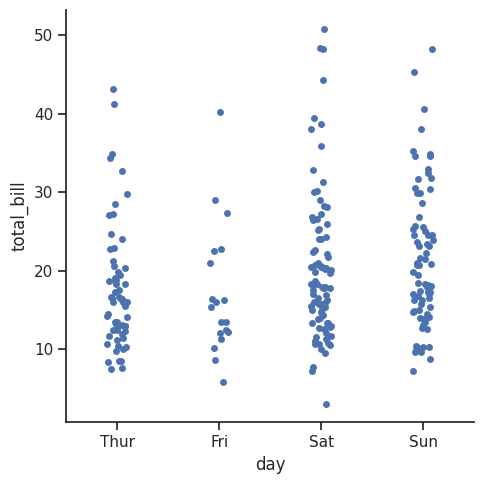

In [31]:
sns.catplot(x="day", y="total_bill", data=tips)

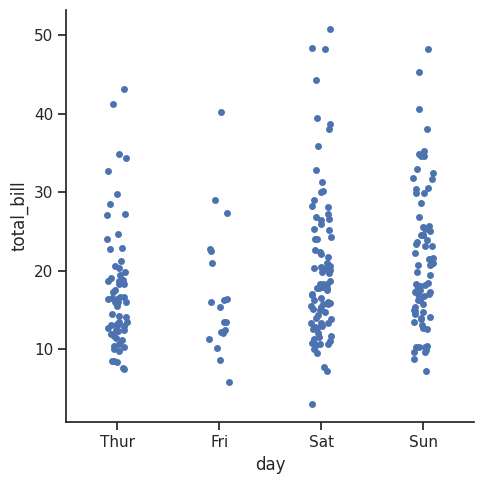

In [32]:
sns.catplot(x="day", y="total_bill", data = tips)

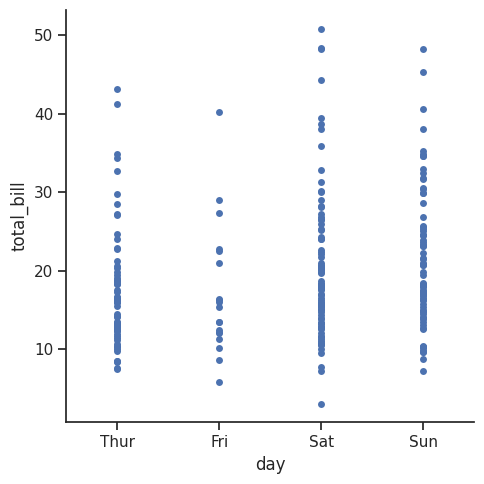

In [33]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

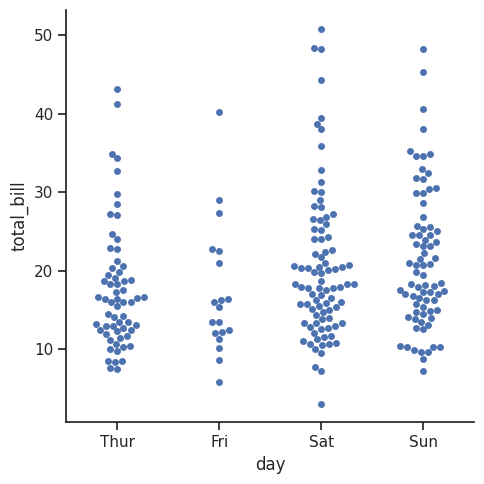

In [34]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

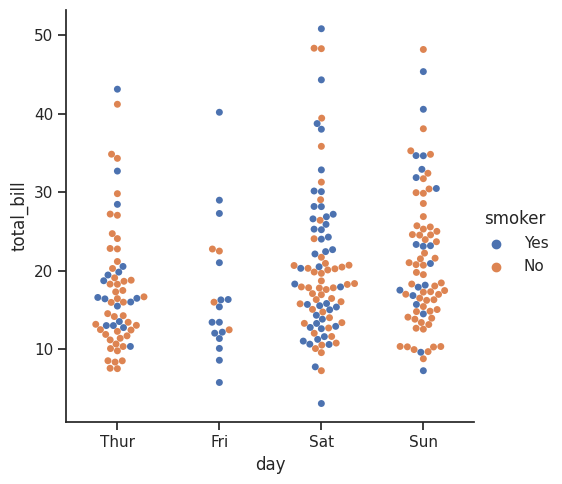

In [35]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="swarm", data=tips)

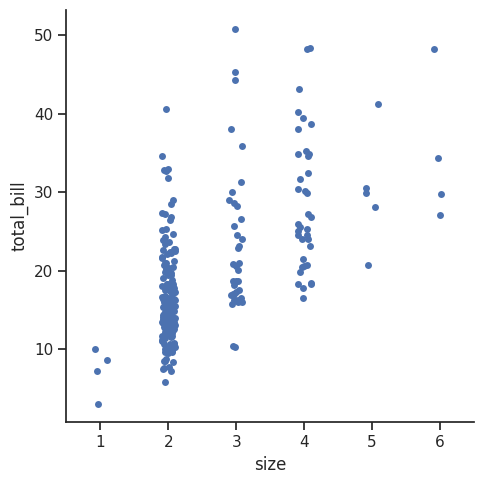

In [36]:
sns.catplot(x="size", y="total_bill", data=tips)

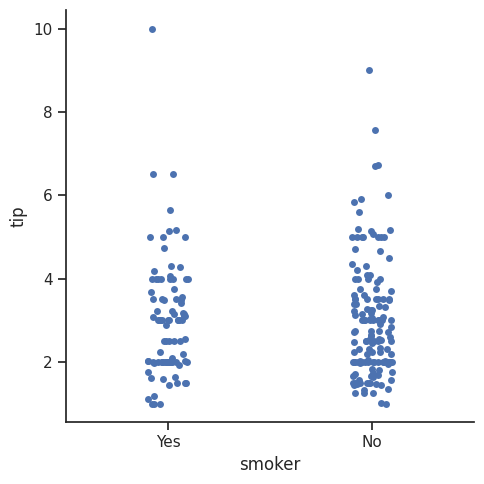

In [37]:
sns.catplot(x="smoker", y="tip", data=tips)

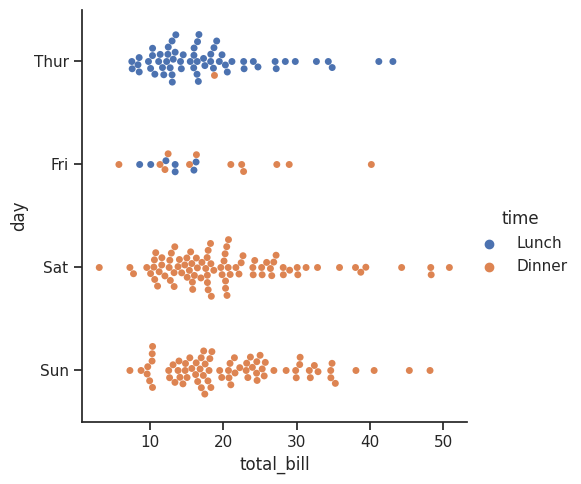

In [38]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

## Boxplots

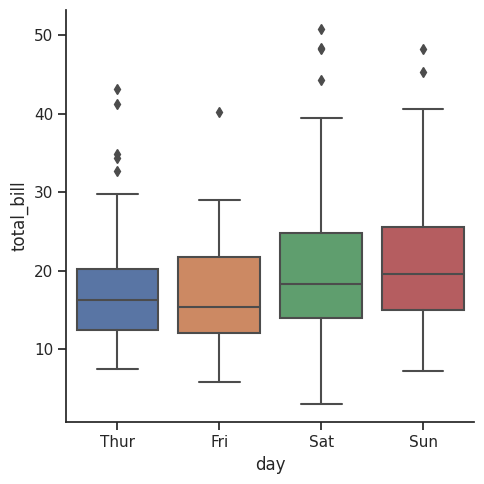

In [39]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips)

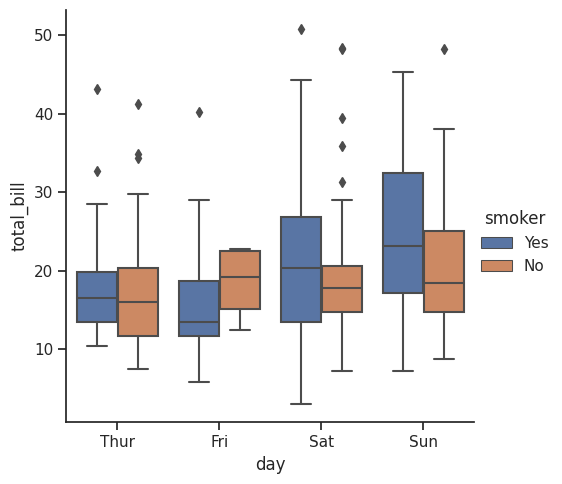

In [40]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips)

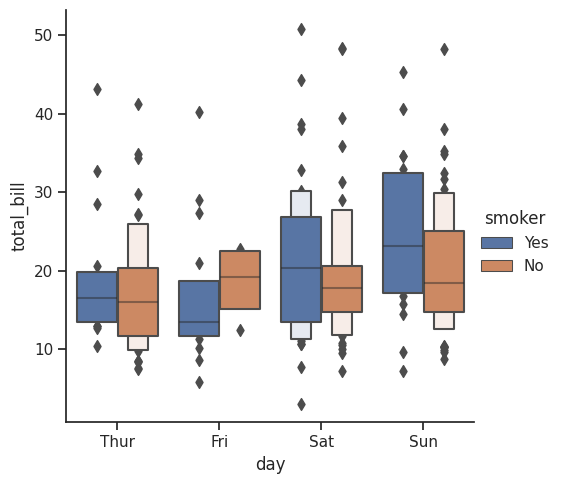

In [41]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="boxen", data=tips)

## Violinplots

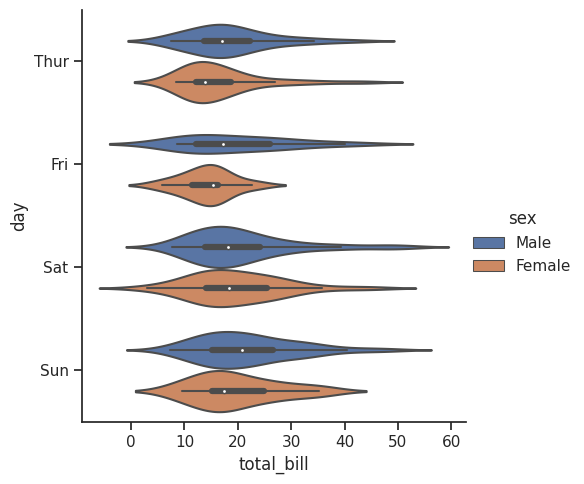

In [42]:
sns.catplot(x="total_bill", y="day", hue="sex", kind="violin", data=tips)

## Bar plots

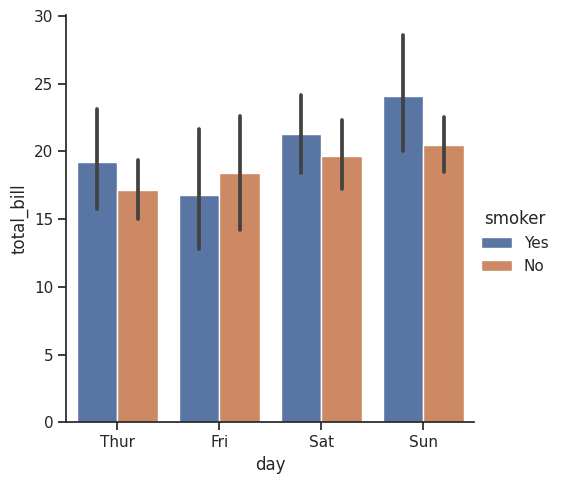

In [43]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="bar", data=tips)

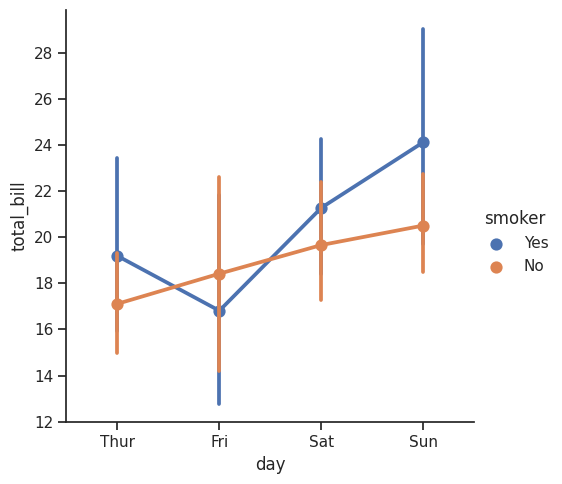

In [44]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="point", data=tips)

In [45]:
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

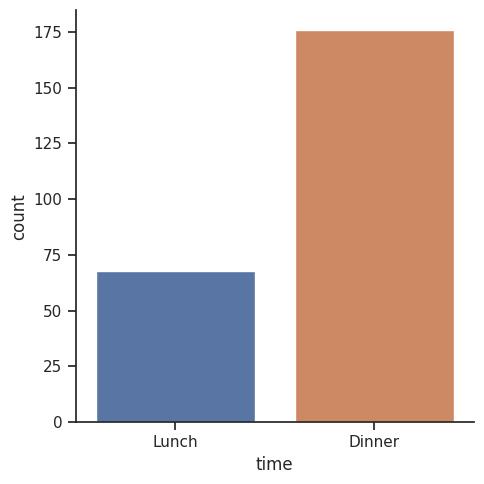

In [46]:
sns.catplot(x="time", kind="count", data=tips)

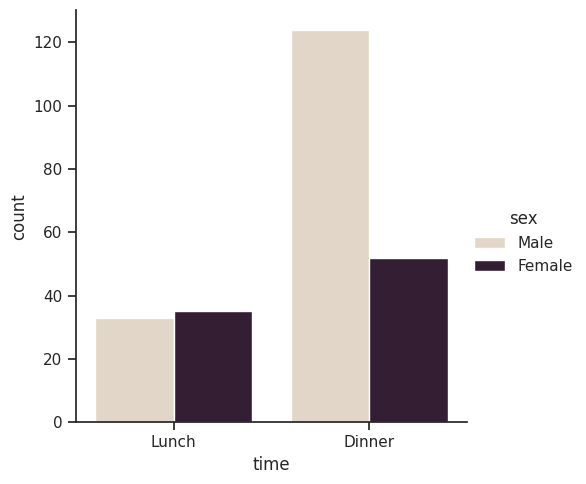

In [47]:
sns.catplot(x="time",hue='sex', kind="count",palette="ch:.25", data=tips)

# Visualizing *statistical* relationships

Visualization can be a core component of this process because, when data are visualized properly, the human visual system can see trends and patterns that indicate a relationship.



* scatterplot() (with kind="scatter"; the default)

* lineplot() (with kind="line")


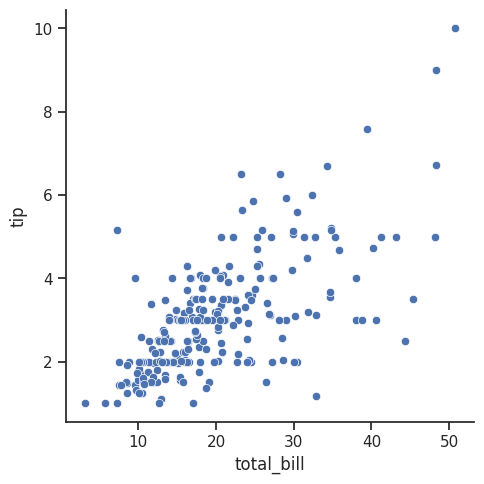

In [48]:
sns.relplot(x="total_bill", y="tip", data=tips)

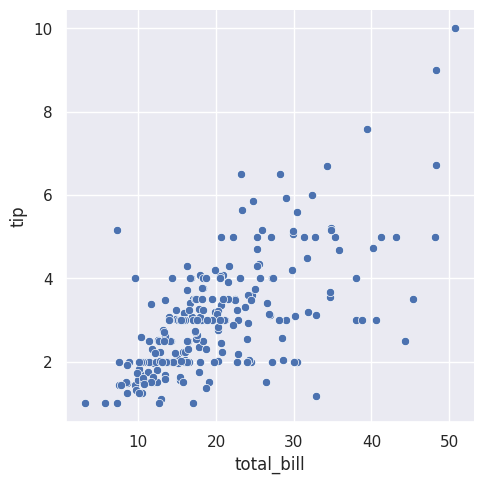

In [49]:
sns.set_theme(style="darkgrid")
sns.relplot(x="total_bill", y="tip", data=tips)

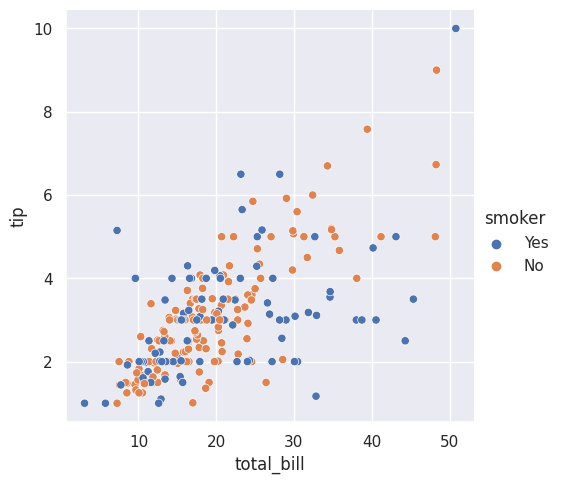

In [50]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

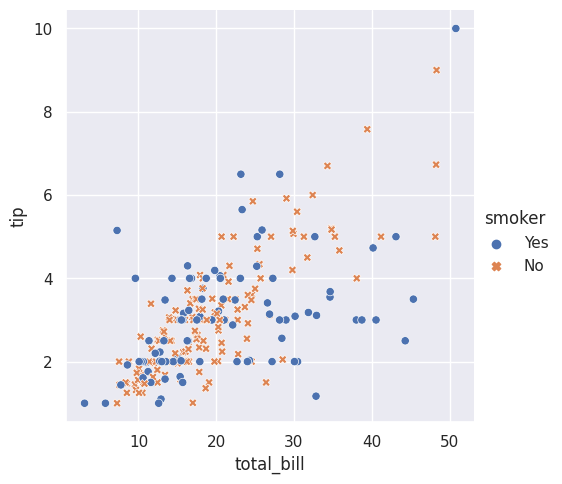

In [51]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",data=tips)

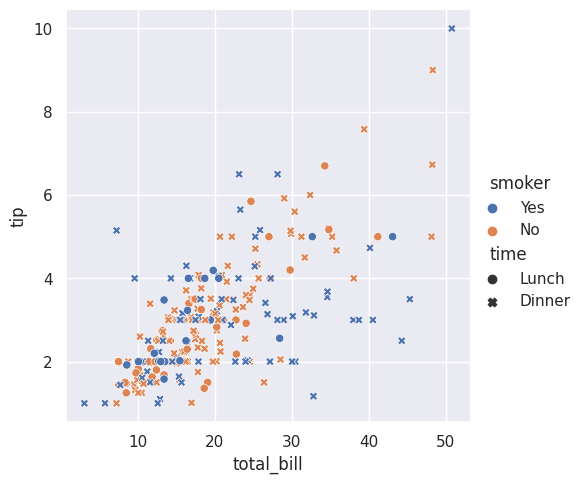

In [52]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)

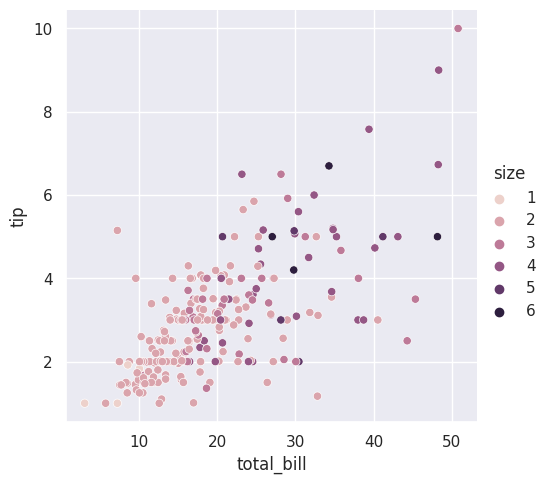

In [53]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips)

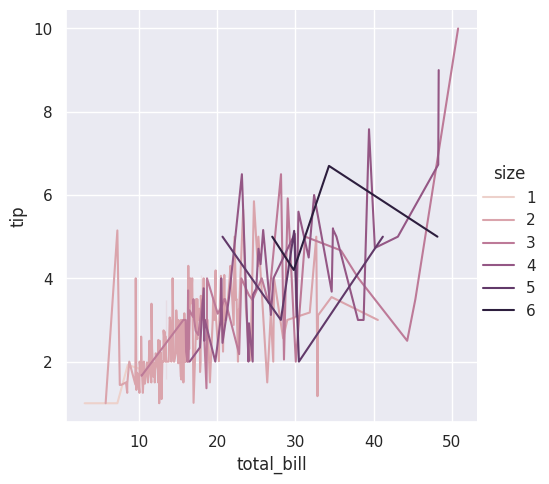

In [54]:
sns.relplot(x="total_bill", y="tip", hue="size",kind='line', data=tips)

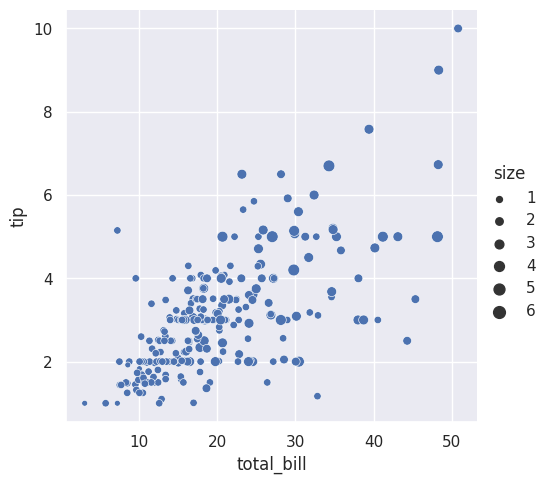

In [55]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips)

## Line plots

In [56]:
df = pd.DataFrame(dict(time=np.arange(500),value=np.random.randn(500).cumsum()))
# cumsum: Return the cumulative sum of the elements along a given axis.

In [57]:
df

,time,value
0,0,1.568861
1,1,1.826480
2,2,5.822628
3,3,4.071933
4,4,2.969207
...,...,...
495,495,-33.823654
496,496,-34.034750
497,497,-35.978593
498,498,-37.792314


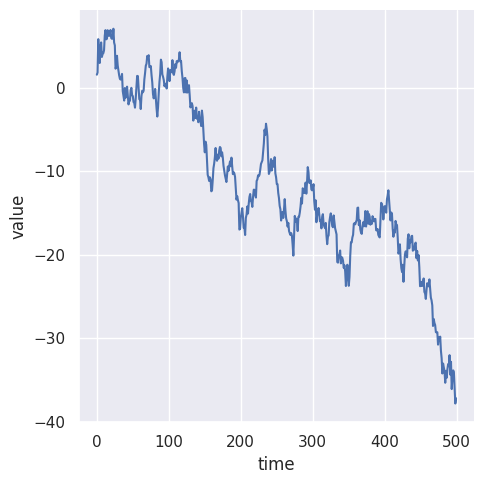

In [58]:
g = sns.relplot(x="time", y="value", kind="line", data=df)

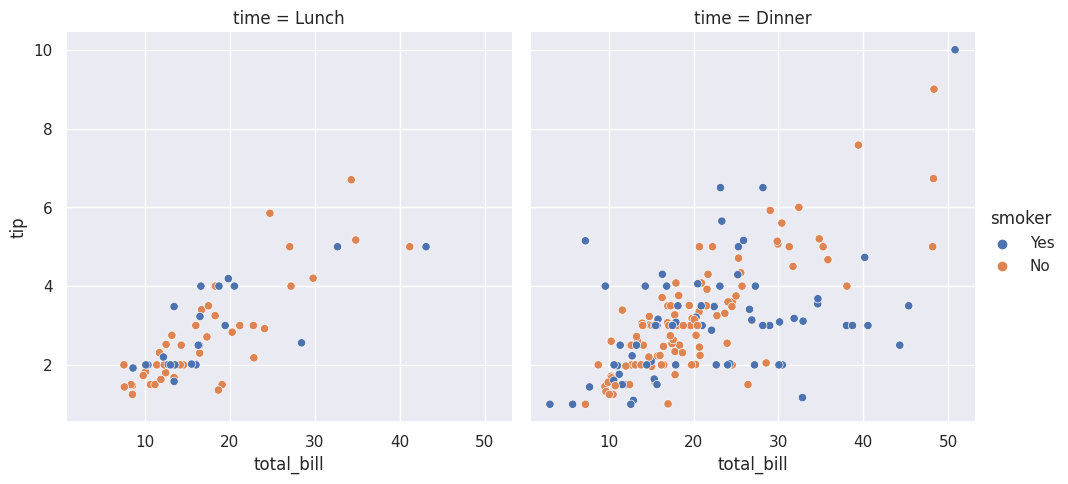

In [59]:
sns.relplot(x="total_bill", y="tip", hue="smoker",col="time", data=tips)

# Visualizing *regression* models

<AxesSubplot: xlabel='total_bill', ylabel='tip'>

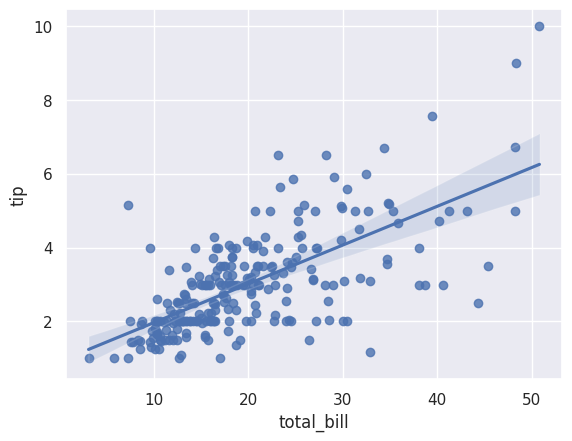

In [60]:
sns.regplot(x="total_bill", y="tip", data=tips)

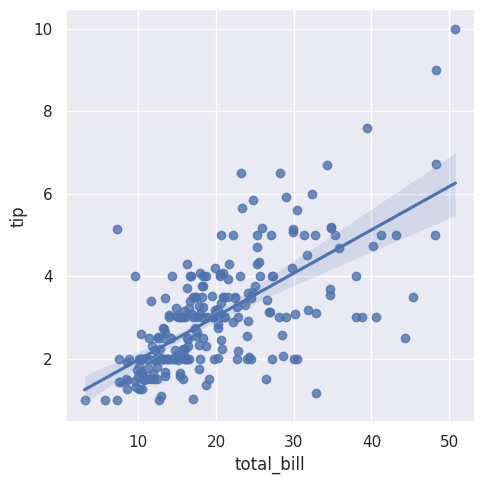

In [61]:
sns.lmplot(x="total_bill", y="tip", data=tips)

# Facetgrid

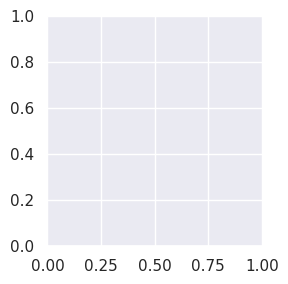

In [62]:
sns.FacetGrid(tips)

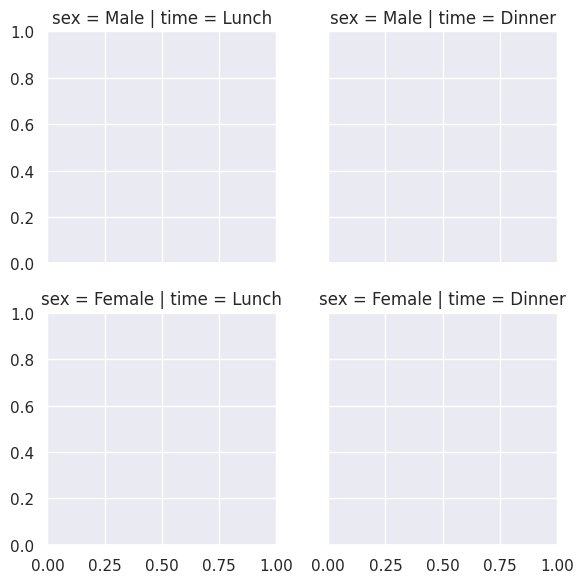

In [63]:
sns.FacetGrid(tips, col="time", row="sex")

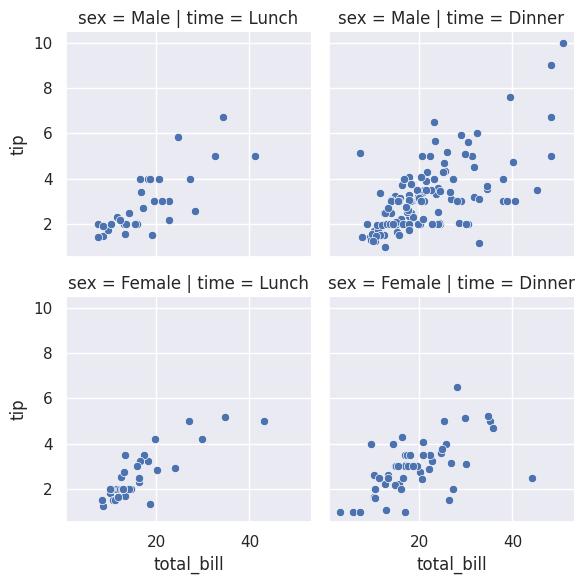

In [64]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

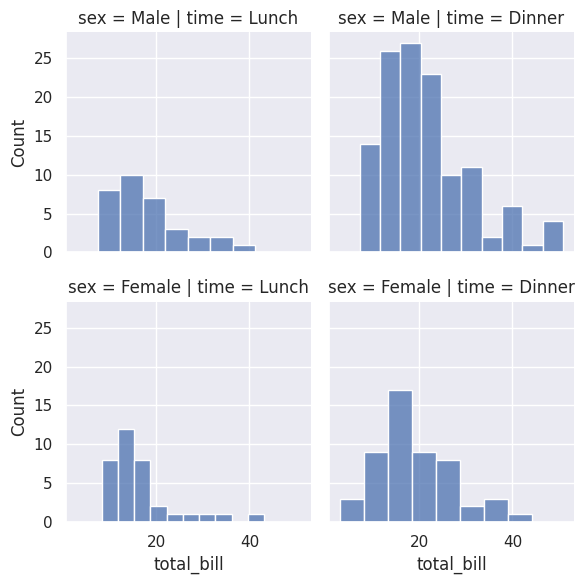

In [65]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map_dataframe(sns.histplot, x="total_bill")

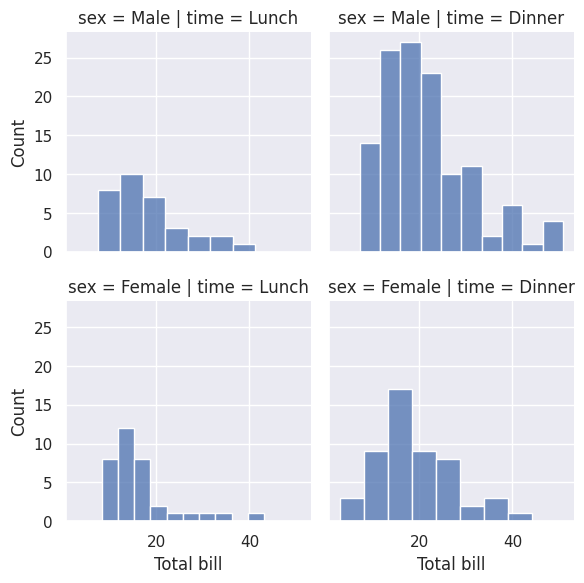

In [66]:
g = sns.FacetGrid(tips, col="time",  row="sex")
g.map_dataframe(sns.histplot, x="total_bill")
g.set_axis_labels("Total bill", "Count")

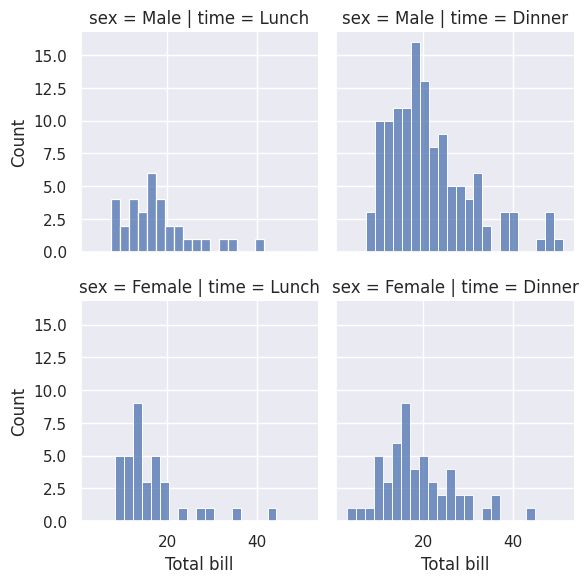

In [67]:
g = sns.FacetGrid(tips, col="time", row="sex")
g.map_dataframe(sns.histplot, x="total_bill", binwidth=2)
g.set_axis_labels("Total bill", "Count")

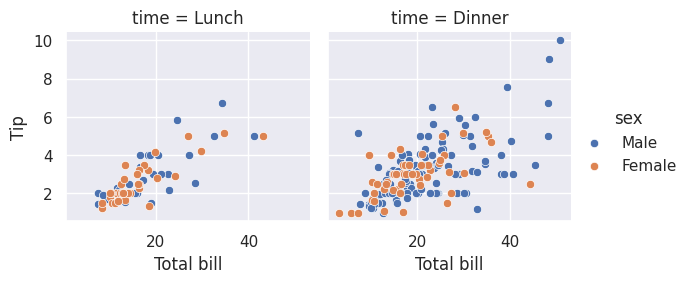

In [68]:
g = sns.FacetGrid(tips, col="time", hue="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.set_axis_labels("Total bill", "Tip")
g.add_legend()

# Showing multiple relationships with facets

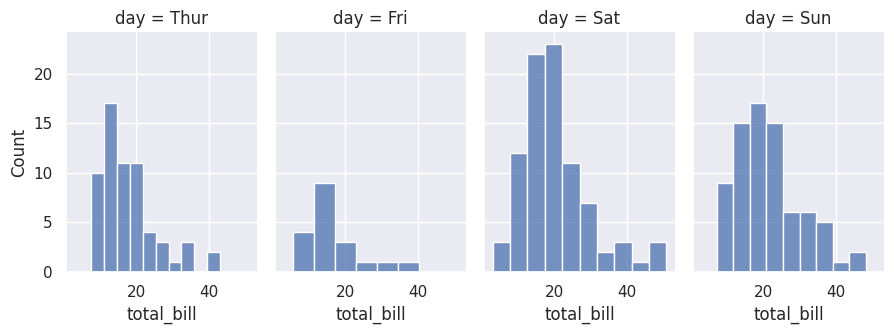

In [69]:
g = sns.FacetGrid(tips, col="day", height=3.5, aspect=.65)
g.map(sns.histplot, "total_bill")